In [101]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import v_measure_score
%matplotlib inline

## Hierarchical clustering

In [83]:
colors = np.array(sns.color_palette('Set2',20))

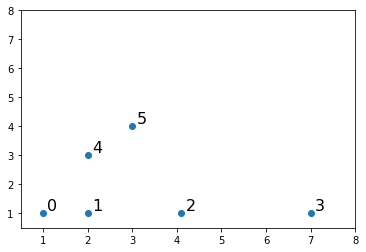

In [19]:
dane = np.array([[1,1],[2,1],[4.1,1],[7,1],[2,3],[3,4]])
plt.scatter(dane[:,0],dane[:,1])
plt.xlim(0.5,8)
plt.ylim(0.5,8)
for ind,point in enumerate(dane):
    plt.text(point[0]+0.1,point[1]+0.1,str(ind),fontsize = 16)
plt.show()

### Single linkage (Nearest Point Algorithm)- join clusters with closest points

In [20]:
single_l = linkage(dane,method='single')

In [21]:
single_l # index1 index2 distance 

array([[ 0.        ,  1.        ,  1.        ,  2.        ],
       [ 4.        ,  5.        ,  1.41421356,  2.        ],
       [ 6.        ,  7.        ,  2.        ,  4.        ],
       [ 2.        ,  8.        ,  2.1       ,  5.        ],
       [ 3.        ,  9.        ,  2.9       ,  6.        ]])

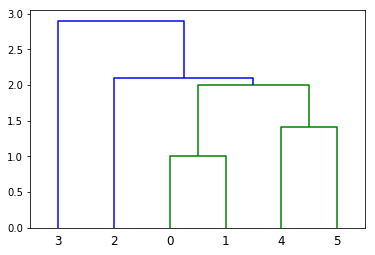

In [22]:
dendrogram(single_l)
plt.show()

### Complete linkage (Farthest Point Algotihm)

In [12]:
complete_l = linkage(dane,method='complete')

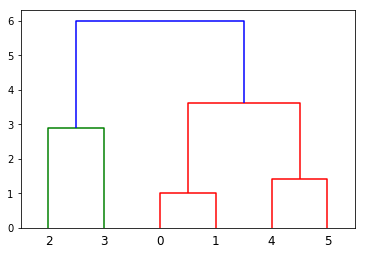

In [11]:
dendrogram(complete_l)
plt.show()

### Ward linkage - minimize growth of inertia (variance) of all clusters 

In [26]:
ward_l = linkage(dane,method='ward')# odporna na autliery

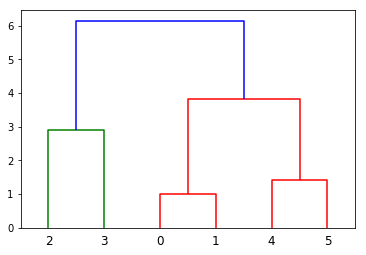

In [27]:
dendrogram(ward_l)
plt.show()

### Average linkage 

In [29]:
average_l = linkage(dane,method='average')

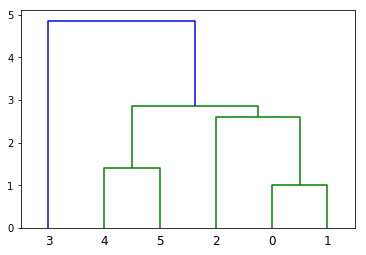

In [30]:
dendrogram(average_l)
plt.show()

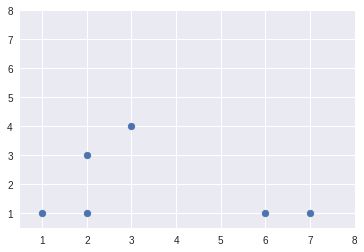

In [77]:
dane = np.array([[1,1],[2,1],[6,1],[7,1],[2,3],[3,4]])
plt.scatter(dane[:,0],dane[:,1])
plt.xlim(0.5,8)
plt.ylim(0.5,8)
plt.show()

In [90]:
linkage_single = linkage(dane,method='single')
labels = fcluster(linkage_single,criterion='distance',t=2.5)
labels

array([2, 2, 1, 1, 2, 2], dtype=int32)

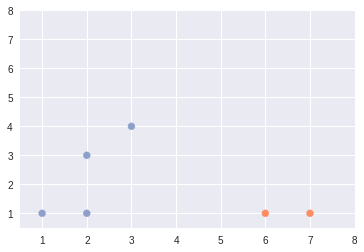

In [91]:
plt.scatter(dane[:,0],dane[:,1],c=colors[labels])
plt.xlim(0.5,8)
plt.ylim(0.5,8)
plt.show()

In [92]:
labels_clusters = fcluster(linkage_single,criterion='maxclust',t=3)

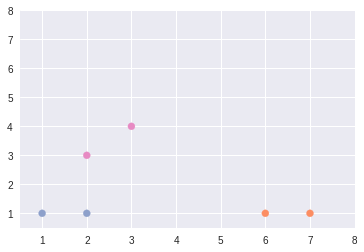

In [93]:
plt.scatter(dane[:,0],dane[:,1],c=colors[labels_clusters])
plt.xlim(0.5,8)
plt.ylim(0.5,8)
plt.show()

### Exercise

In [31]:
rnd.seed(123)
points = np.concatenate([rnd.multivariate_normal((0,0),np.array([[0.1,0],[0,10]]),30),
                    rnd.multivariate_normal((6,5),np.array([[10,0],[0,0.1]]),30),
                    rnd.multivariate_normal((8,-2),np.array([[1,0],[0,1]]),30)],axis=0)
labels = np.repeat(range(3),30)

import seaborn as sns
colors = sns.color_palette("Set2", 20)

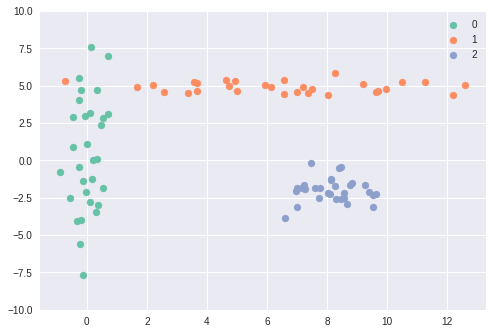

In [32]:
for i in np.unique(labels):
    plt.scatter(points[labels==i,0],points[labels==i,1], c=colors[i], label=i) 
plt.ylim(-10,10)
plt.legend()
plt.show()

In [50]:
single = linkage(points,method='single')
complete = linkage(points,method='complete')
ward = linkage(points,method='ward')
average = linkage(points,method='average')

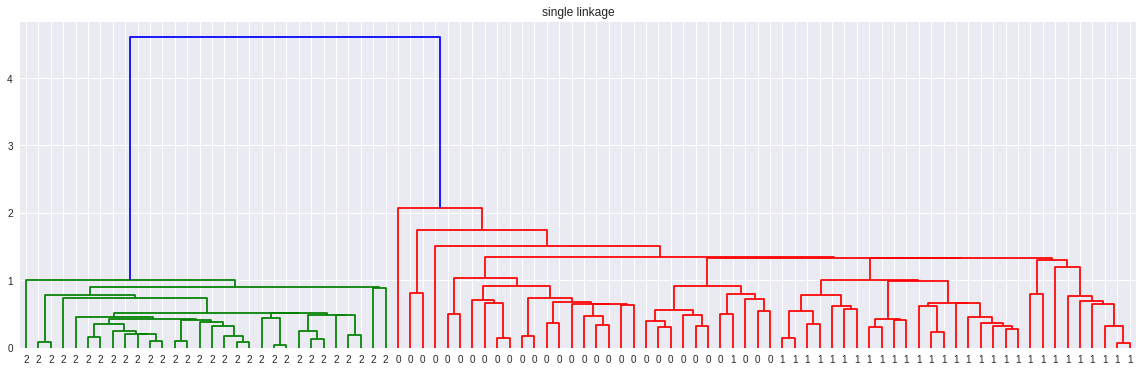

In [62]:
plt.figure(figsize=(20,6))
plt.title('single linkage')
dendrogram(single,labels=labels,leaf_font_size=10,leaf_rotation=True,orientation='top');

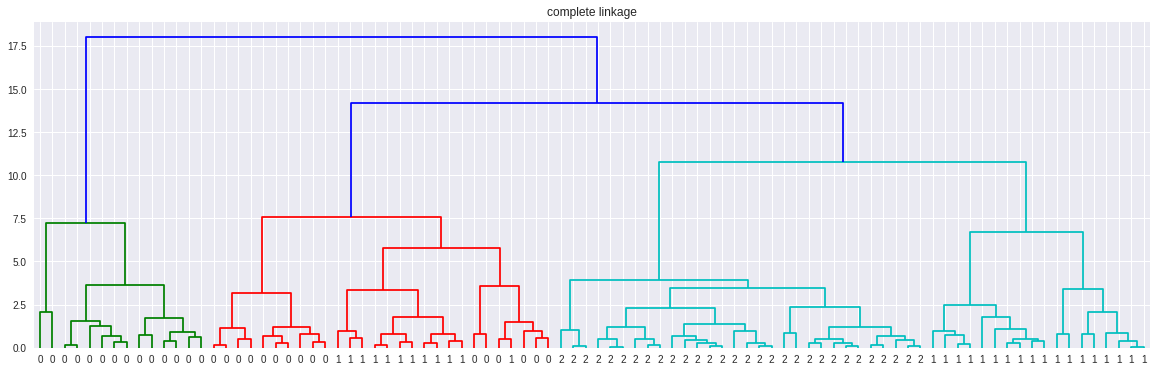

In [63]:
plt.figure(figsize=(20,6))
plt.title('complete linkage')
dendrogram(complete,labels=labels,leaf_font_size=10,leaf_rotation=True,orientation='top');

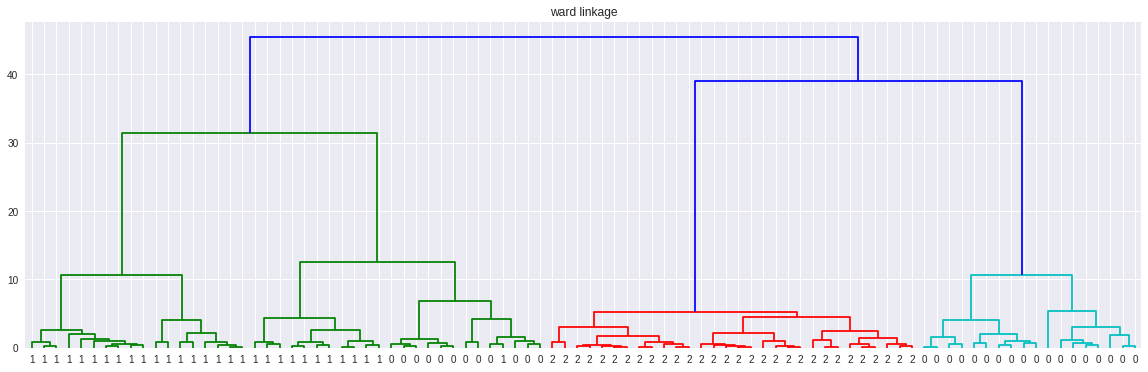

In [64]:
plt.figure(figsize=(20,6))
plt.title('ward linkage')
dendrogram(ward,labels=labels,leaf_font_size=10,leaf_rotation=True,orientation='top');

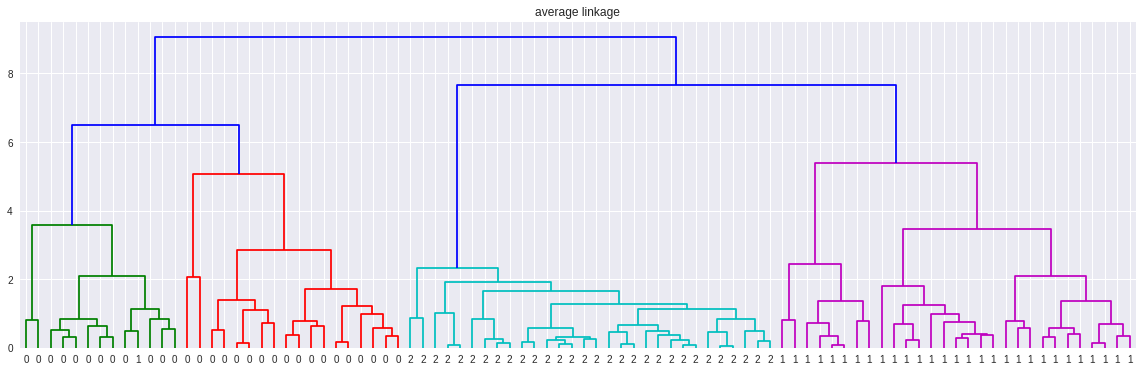

In [65]:
plt.figure(figsize=(20,6))
plt.title('average linkage')
dendrogram(average,labels=labels,leaf_font_size=10,leaf_rotation=True,orientation='top');

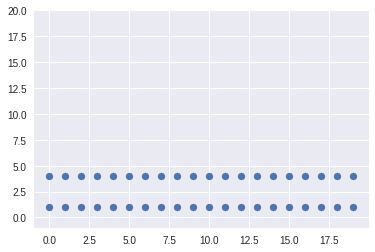

In [66]:
x = np.vstack([np.tile(range(20),2),np.repeat(np.array([1,4]),20)]).T

plt.scatter(x[:,0],x[:,1])
plt.ylim(-1,20)
plt.show()

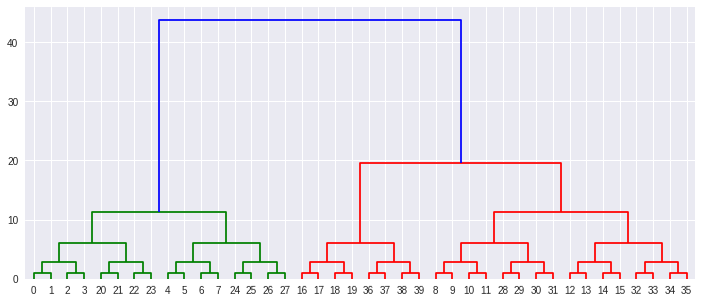

In [68]:
plt.figure(figsize=(12,5))
m = linkage(x,"ward")
dendrogram(m,leaf_font_size=10,leaf_rotation=True)
plt.show()

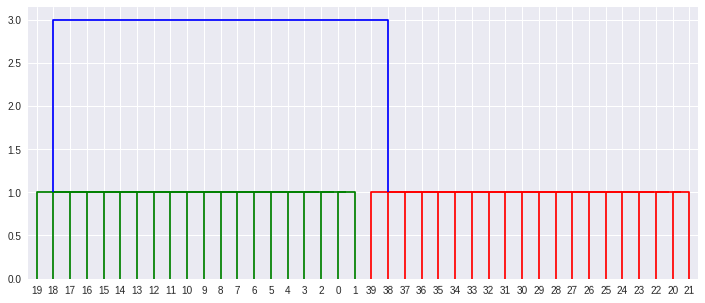

In [69]:
plt.figure(figsize=(12,5))
m = linkage(x,"single")
dendrogram(m,leaf_font_size=10,leaf_rotation=True)
plt.show()

### Seeds

In [94]:
samples = np.loadtxt("Data/seeds_dataset.txt")

samples = pd.DataFrame(samples)

samples.columns = ["area", "perimeter", "compactness", "kernel_length", "kernel_width", "asymmetry", 
                   "kernel_groove_length", "variety"]

In [95]:
samples.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry,kernel_groove_length,variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


In [96]:
samples.describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry,kernel_groove_length,variety
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [97]:
samples.variety.unique()

array([ 1.,  2.,  3.])

In [98]:
samples_small = samples.sample(n=70).reset_index(drop=True)

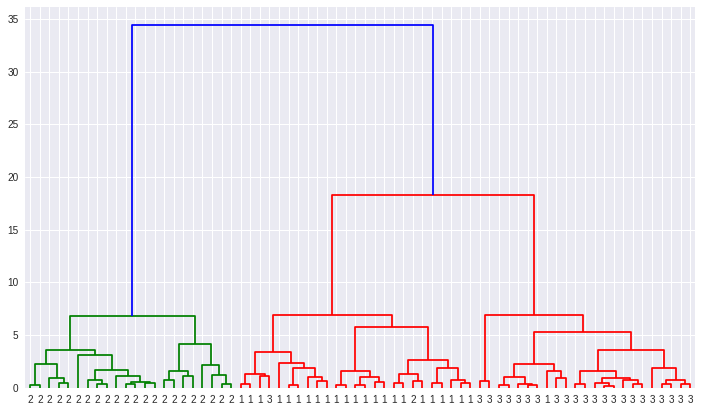

In [99]:
plt.figure(figsize=(12,7))
m = linkage(samples_small.drop('variety',axis=1),"ward")
dendrogram(m,labels=samples_small.variety.values.astype('int'),
           leaf_font_size=10,leaf_rotation=True,orientation='top')
plt.show()

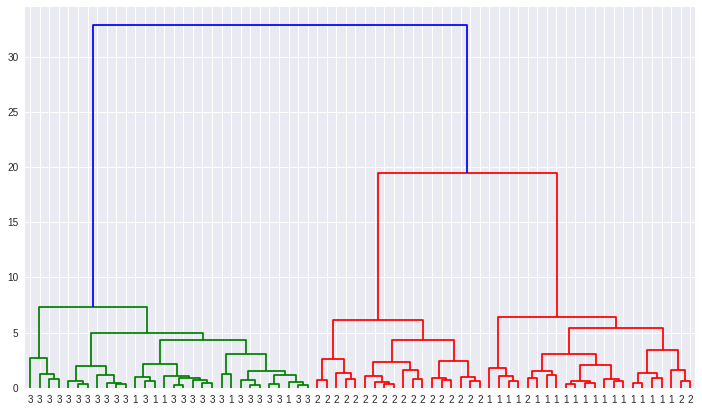

In [128]:
plt.figure(figsize=(12,7))
m = linkage(samples_small.drop('variety',axis=1),"ward")
dendrogram(m,labels=samples_small.variety.values.astype('int'),
           leaf_font_size=10,leaf_rotation=True,orientation='top')
plt.show()

In [100]:
labels_seeds = fcluster(m,criterion='maxclust',t=3)

In [105]:
v_measure_score(labels_true=samples_small.variety.values.astype('int'),labels_pred=labels_seeds)

0.83829519707899069

### Hierarchical clustering in sklearn 

In [106]:
from sklearn.cluster import AgglomerativeClustering